In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller

In [2]:
df=pd.read_csv('product k.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [3]:
sales_k= df.drop(['Product Name','Product Category','Month','Year','Market Size', 'Marketing Expense','Month No.'],axis=1)

In [4]:
sales_k.shape

(60, 1)

In [5]:
sales_k.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [6]:
sales_k['Sales'].sum()

32299304

Text(0.5, 1.0, 'Product K')

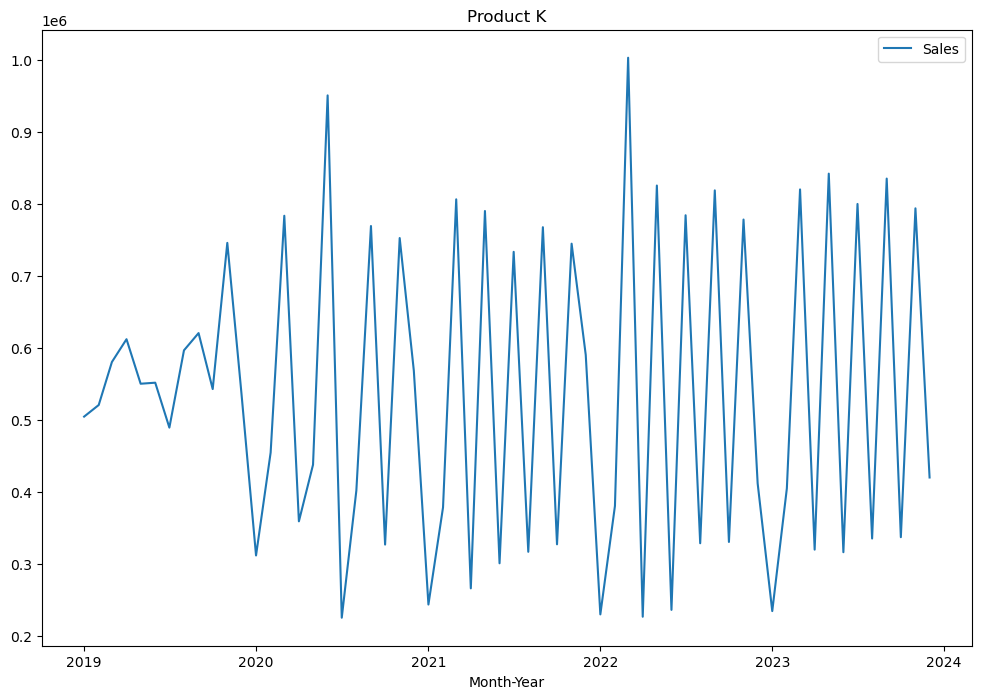

In [7]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_k)
plt.title('Product K')

In [8]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [9]:
adf_test(sales_k)

ADF Statistics: -4.339743021722731
p- value: 0.0003788479952270515
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


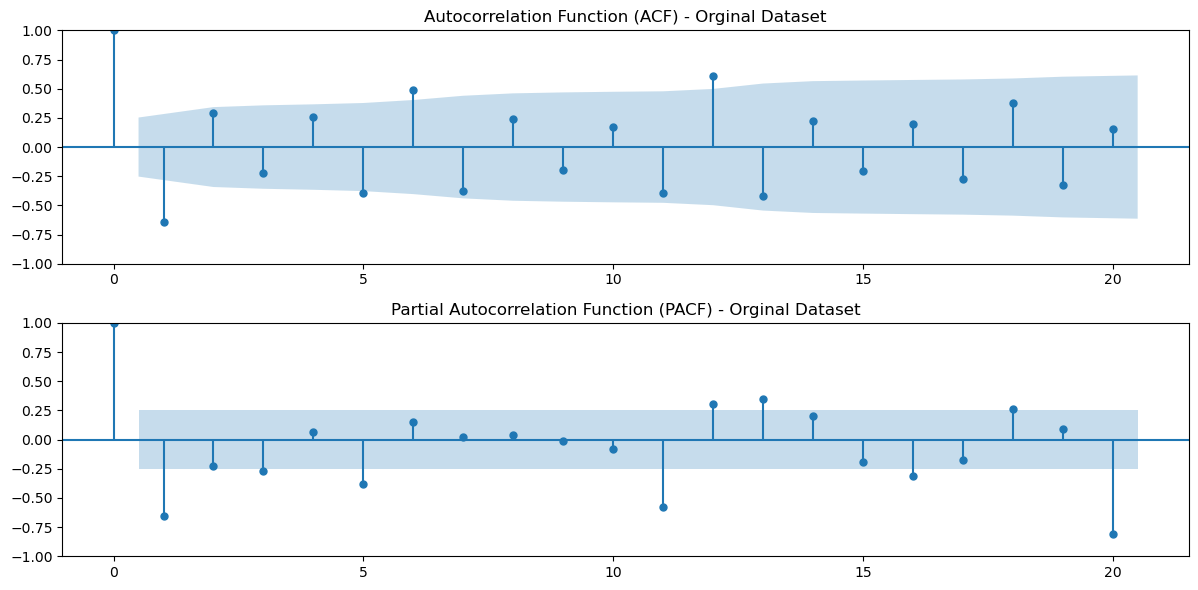

In [10]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_k, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Orginal Dataset')

plt.subplot(212)
plot_pacf(sales_k, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Orginal Dataset')

plt.tight_layout()
plt.show()

In [11]:
train= sales_k[:48]
test=sales_k[48:]

In [12]:
len(train)

48

In [13]:
#the combination p=(0,1,2,3,4,5) d=0 q=(0,1,2,3,4) must be tested with accuracy metrics and aic

In [14]:
#param = [(0,0,0),(0,0,1),(0,0,2),(0,0,3),(0,0,4),(1,0,0),(1,0,1),(1,0,2),(1,0,3),(1,0,4),(2,0,0), (2,0,1), (2,0,2),(2,0,3),(2,0,4),(3,0,0),(3,0,1),(3,0,2),(3,0,3),(3,0,4),(4,0,0),(4,0,1),(4,0,2),(4,0,3),(4,0,4),(5,0,0),(5,0,1),(5,0,2),(5,0,3),(5,0,4)]

#for p in param:  # Changed 'x' to 'p'
#    model = ARIMA(train, order=p).fit()
#    pred = model.forecast(steps=len(test))
#    mae = mean_absolute_error(test, pred)
#    # Calculate MAPE manually
#    mape = np.mean(np.abs((test - pred) / test)) * 100
#    mse=mean_squared_error(test, pred)
#    rmse = np.sqrt(mean_squared_error(test, pred))
#    print(p)
#    print(f'MAE: {mae}')
#    print(f'MSE: {mse}')
#    print(f'RMSE: {rmse}')
#    print('A.I.C:', model.aic)

In [15]:
order=[]
for p in range(6):
    # Loop over MA order
    for q in range(4):
        # Fit model        
#       model= ARIMA(sales_i, order=(p,1,q))
        model_t = ARIMA(train['Sales'], order=(p,0,q))
        model_test=model_t.fit() 
        pred=model_test.predict(start=len(train), end=(len(sales_k)-1))
        mae = mean_absolute_error(test, pred)
        mape = np.mean(np.abs((test - pred) / test)) * 100
        mse=mean_squared_error(test, pred)
        rmse = np.sqrt(mean_squared_error(test, pred))
        # Add order and scores to list        
        order.append((p, q, model_test.aic, model_test.bic,mae, mse, rmse))
#Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order, columns=['p','q', 'aic', 'bic', 'mae','mse', 'rmse'])

In [16]:
# Sort by AIC
print(order_df.sort_values('aic'))

    p  q          aic          bic            mae           mse           rmse
23  5  3  1287.726977  1306.438987  101564.559278  1.767619e+10  132951.834402
20  5  0  1288.555239  1301.653646  168570.362476  3.498171e+10  187033.986405
6   1  2  1289.128066  1298.484071  123939.089630  2.439812e+10  156198.984145
5   1  1  1289.306535  1296.791339  233867.683420  5.855976e+10  241991.246743
21  5  1  1289.544855  1304.514463  132006.711697  2.605608e+10  161418.955474
14  3  2  1290.134277  1303.232684  110045.035543  2.186682e+10  147874.353713
7   1  3  1290.541602  1301.768808  135536.160691  2.652834e+10  162875.234547
11  2  3  1290.720087  1303.818494  133590.254436  2.431843e+10  155943.689549
12  3  0  1290.761019  1300.117024  223382.377836  5.460340e+10  233673.702879
1   0  1  1290.936391  1296.549994  232301.000538  5.746808e+10  239725.011151
18  4  2  1291.058290  1306.027898  106942.649182  2.205773e+10  148518.466596
2   0  2  1291.151838  1298.636642  234926.972414  5

In [17]:
m_arima= ARIMA (train, order=(5,0,3))
model_arima=m_arima.fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(5, 0, 3)   Log Likelihood                -633.863
Date:                Thu, 09 May 2024   AIC                           1287.727
Time:                        19:41:31   BIC                           1306.439
Sample:                    01-01-2019   HQIC                          1294.798
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.382e+05   9256.682     58.145      0.000     5.2e+05    5.56e+05
ar.L1         -0.7239      0.251     -2.889      0.004      -1.215      -0.233
ar.L2         -0.5706      0.290     -1.970      0.0

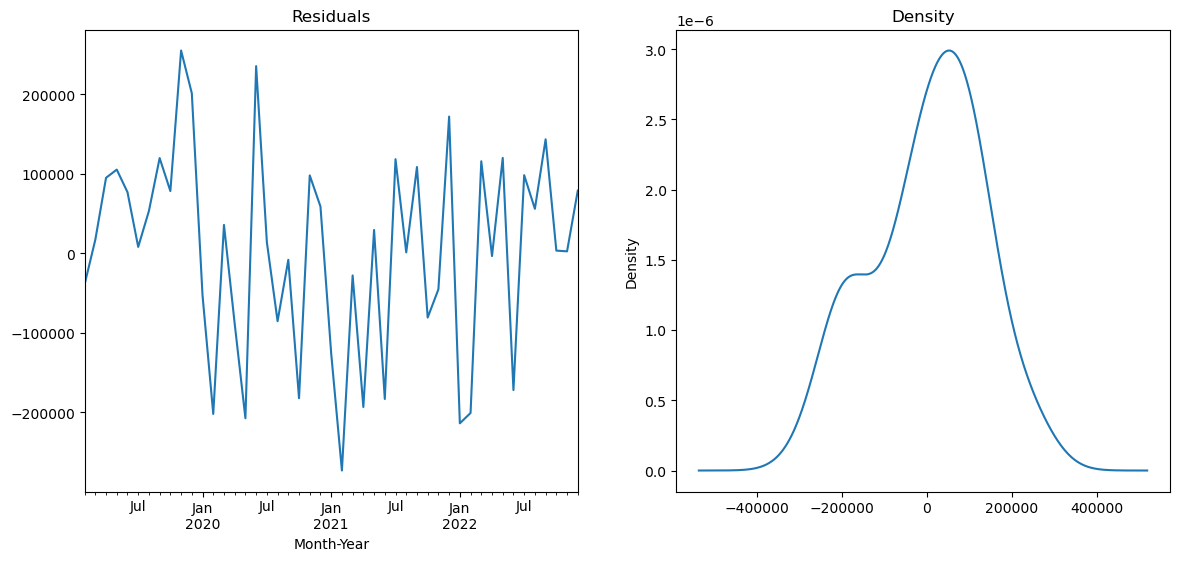

In [18]:
residuals= model_arima.resid[1:]
fig,ax=plt.subplots(1,2, figsize=(14, 6))
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show()

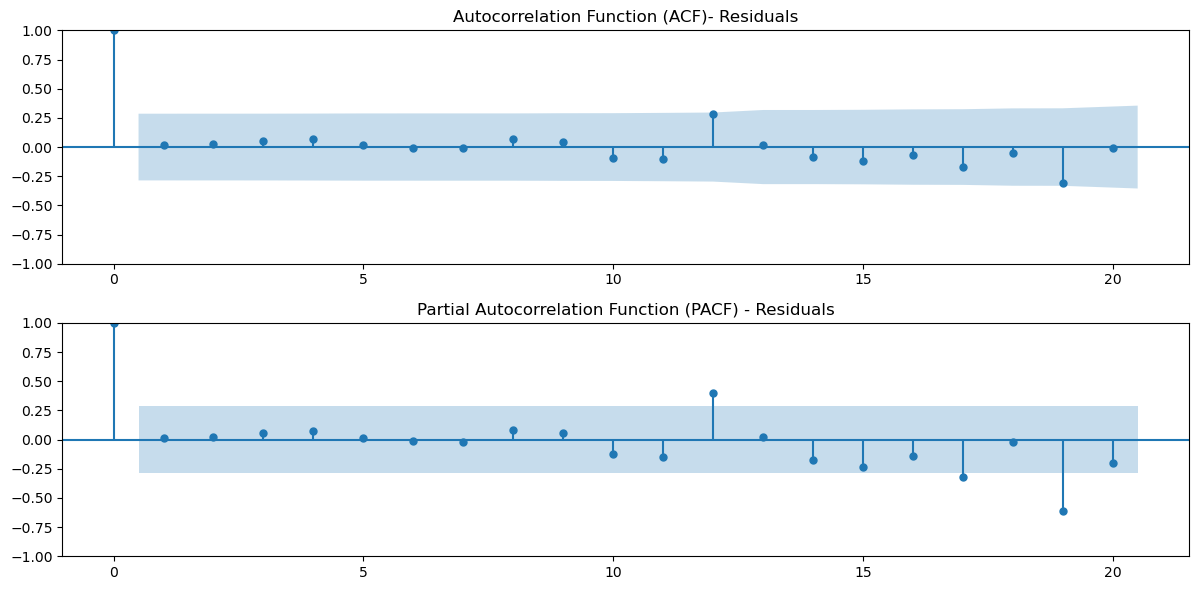

In [19]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)- Residuals')

plt.subplot(212)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Residuals')

plt.tight_layout()
plt.show()

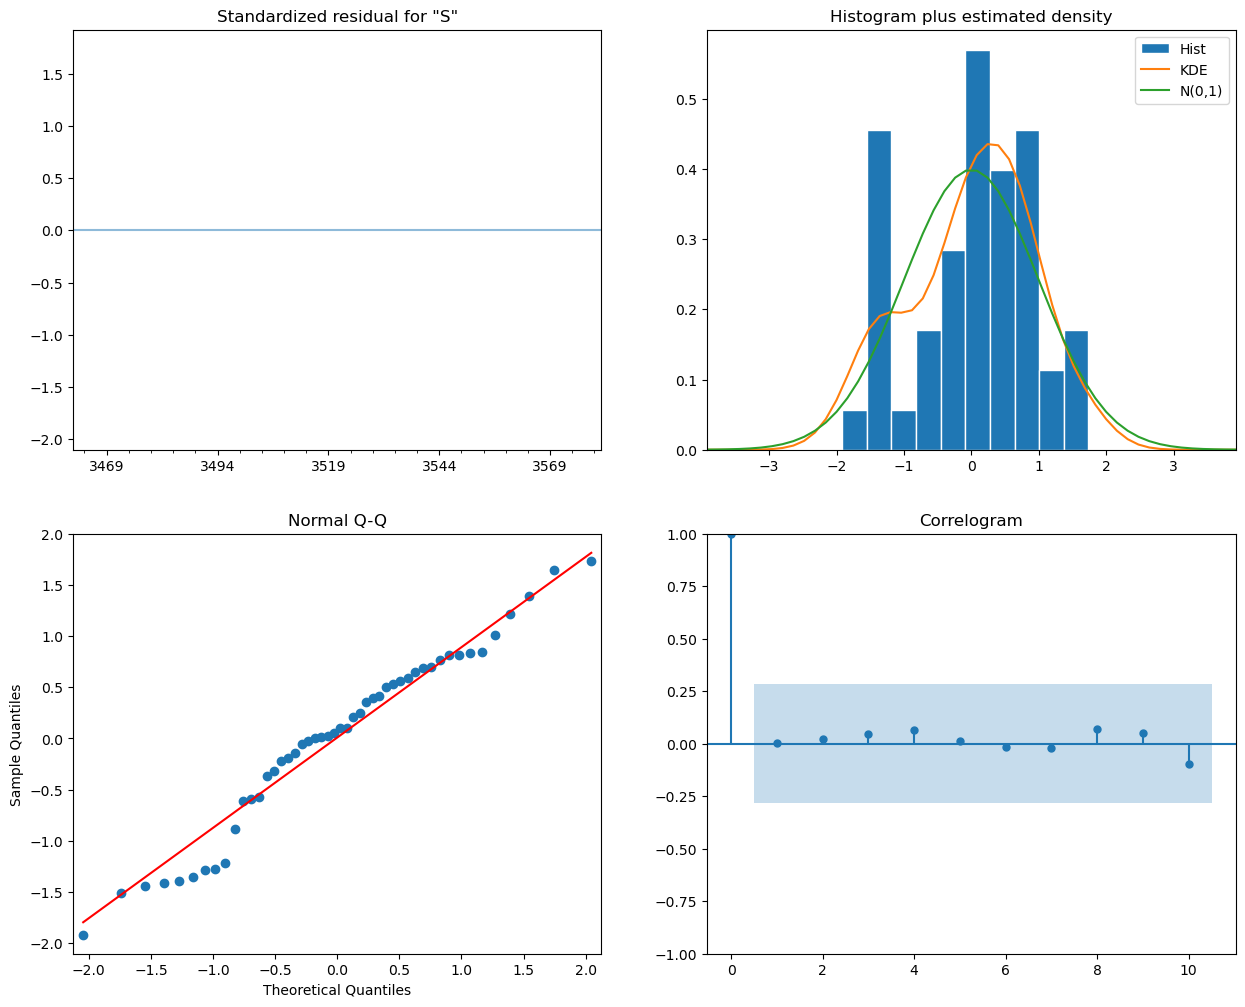

In [20]:
# Create the 4 diagostics plots
model_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [21]:
#pred=model.forecast(steps= len(test))
#sales_k['Forecast_ARIMA']=[None]*len(train) + list(pred)
#sales_k.plot()

In [22]:
pred=model_arima.predict(start=len(train), end=(len(sales_k)-1), dynamic = True)
sales_k['Forecast_ARIMA']=[None]*len(train) + list(pred)

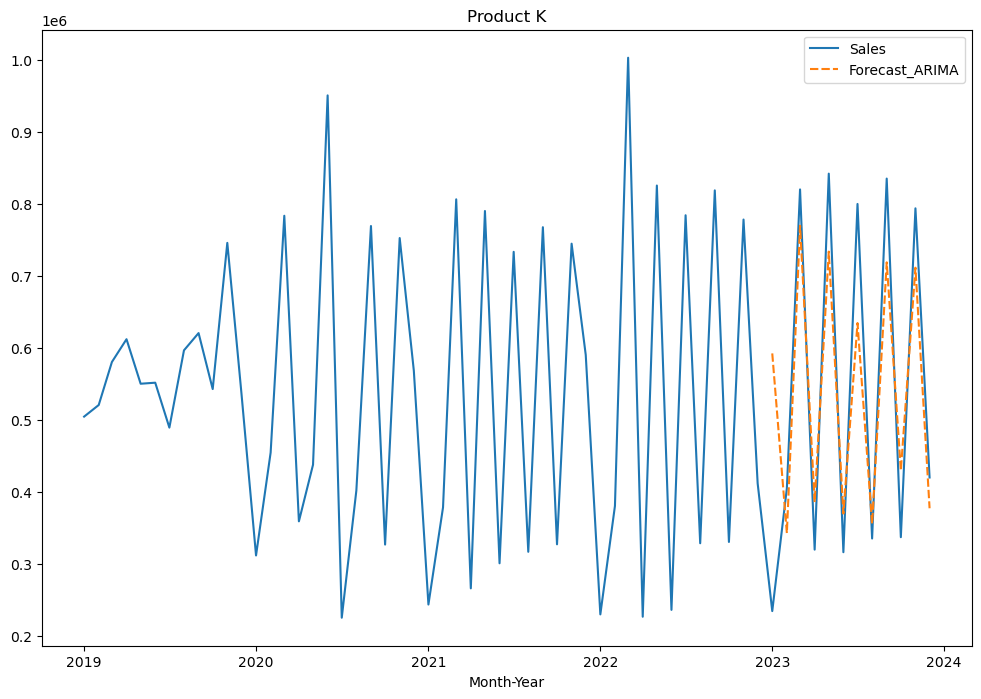

In [23]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_k)
plt.title('Product K')
plt.show()

In [24]:
mae_arima= mean_absolute_error(test,pred)
mse_arima=mean_squared_error(test, pred)
mape_arima= mean_absolute_percentage_error(test,pred)
rmse_arima= np.sqrt(mean_squared_error(test,pred))

print(f'MAE - ARIMA: {mae_arima}')
print(f'MAPE - ARIMA: {mape_arima}')
print(f'MSE - ARIMA: {mse_arima}')
print(f'RMSE - ARIMA: {rmse_arima}')

MAE - ARIMA: 101564.55927762936
MAPE - ARIMA: 0.2609014695449156
MSE - ARIMA: 17676190270.941418
RMSE - ARIMA: 132951.8344023181


# SARIMA

In [25]:
import statsmodels.api as sm

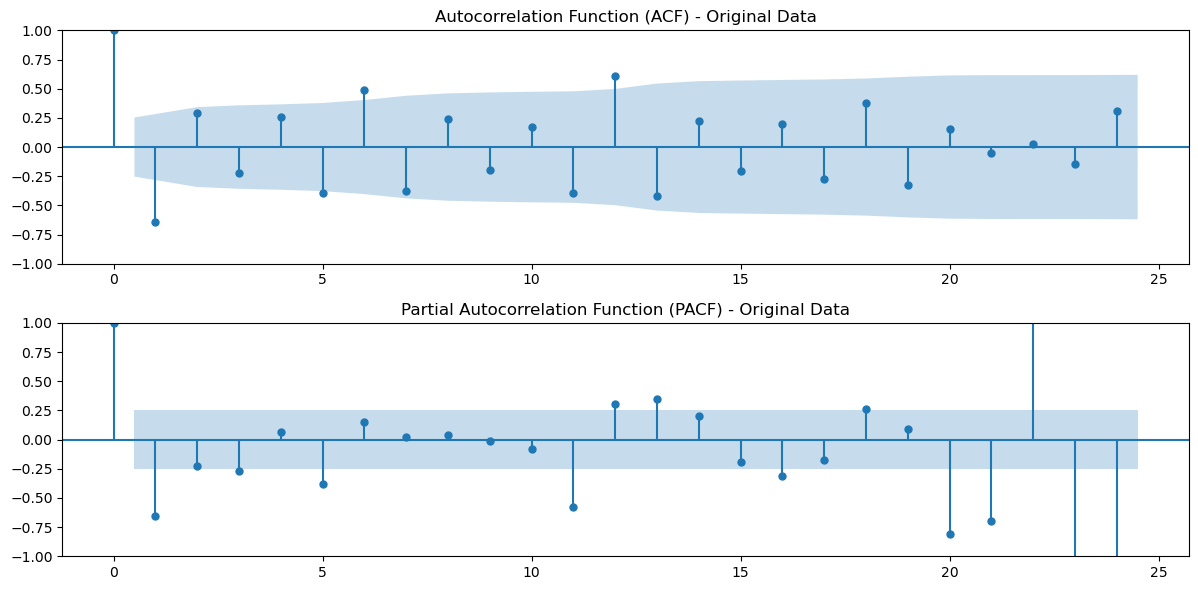

In [26]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_k['Sales'], lags=24, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Original Data')

plt.subplot(212)
plot_pacf(sales_k['Sales'], lags=24, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Original Data')

plt.tight_layout()
plt.show()

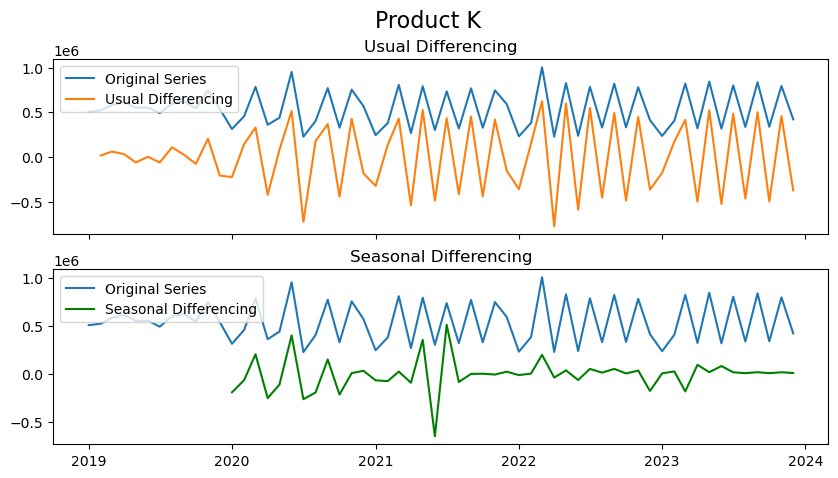

In [27]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(sales_k['Sales'], label='Original Series')
axes[0].plot(sales_k['Sales'].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(sales_k['Sales'], label='Original Series')
axes[1].plot(sales_k['Sales'].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Product K', fontsize=16)
plt.show()

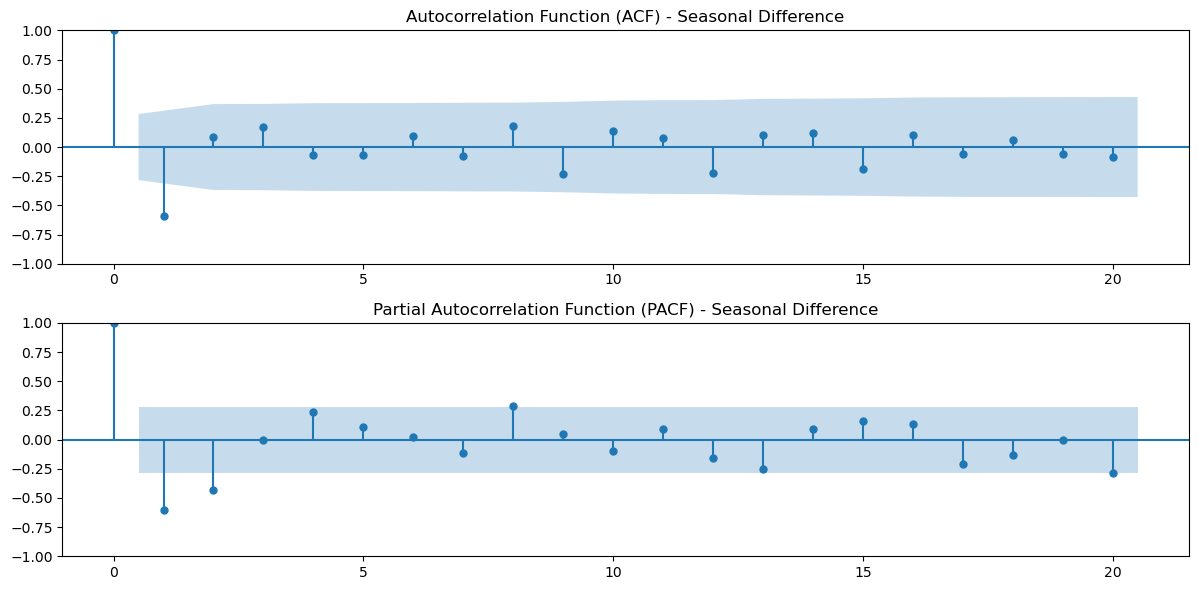

In [28]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_k['Sales'].diff(12).dropna(), lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Seasonal Difference')

plt.subplot(212)
plot_pacf(sales_k['Sales'].diff(12).dropna(), lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Seasonal Difference')

plt.tight_layout()
plt.show()

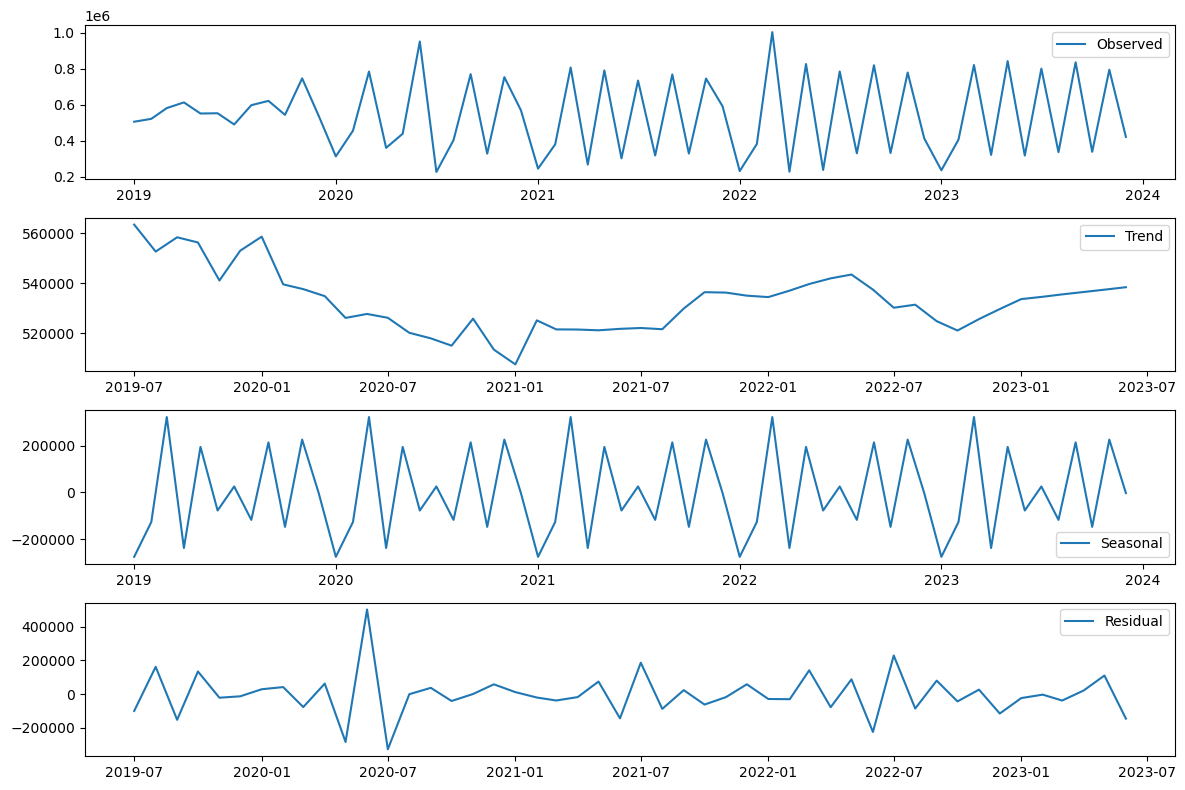

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_k['Sales'], model='additive', period=12)

# Plot the decomposition
#fig = decomposition.plot(figsize=(12,8))
#plt.show()
# Create a new figure with the specified size
plt.figure(figsize=(12, 8))

# Plot each component separately
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [31]:
order_SARIMAX=[]
# Loop over P order
for P in range(4):
    # Loop over Q order
    for Q in range(2):
        # Fit model
        model_s = sm.tsa.statespace.SARIMAX(train['Sales'], order=(5, 0, 3), seasonal_order=(P, 1, Q, 12))
        model_test_s = model_s.fit() 
        pred = model_test_s.predict(start=48, end=59, dynamic=True)
        mae = mean_absolute_error(test, pred)
        mse = mean_squared_error(test, pred)
        # Add order and scores to list        
        order_SARIMAX.append((P, Q, model_test_s.aic, model_test_s.bic, mae, mse))

# Make DataFrame of model order and scores
order_SARIMAX_df = pd.DataFrame(order_SARIMAX, columns=['P', 'Q', 'aic', 'bic', 'mae', 'mse'])

In [32]:
# Sort by AIC
print(order_SARIMAX_df.sort_values('aic'))

   P  Q         aic         bic           mae           mse
0  0  0  969.569413  983.821083  63637.024136  5.583525e+09
2  1  0  970.208189  986.043378  62417.695230  5.348558e+09
3  1  1  970.400045  987.818753  65538.043245  8.408359e+09
1  0  1  970.815464  986.650654  63406.968048  5.607648e+09
5  2  1  972.990232  991.992459  54567.640599  5.428166e+09
4  2  0  973.240229  990.658937  56037.963576  6.313326e+09
6  3  0  973.893821  992.896048  70674.037413  9.349840e+09
7  3  1  974.880090  995.465837  63432.394064  7.349142e+09


In [33]:
sarima=sm.tsa.statespace.SARIMAX(train['Sales'],order=(5, 0, 3),seasonal_order=(0,1,0,12))
sarima_model=sarima.fit()

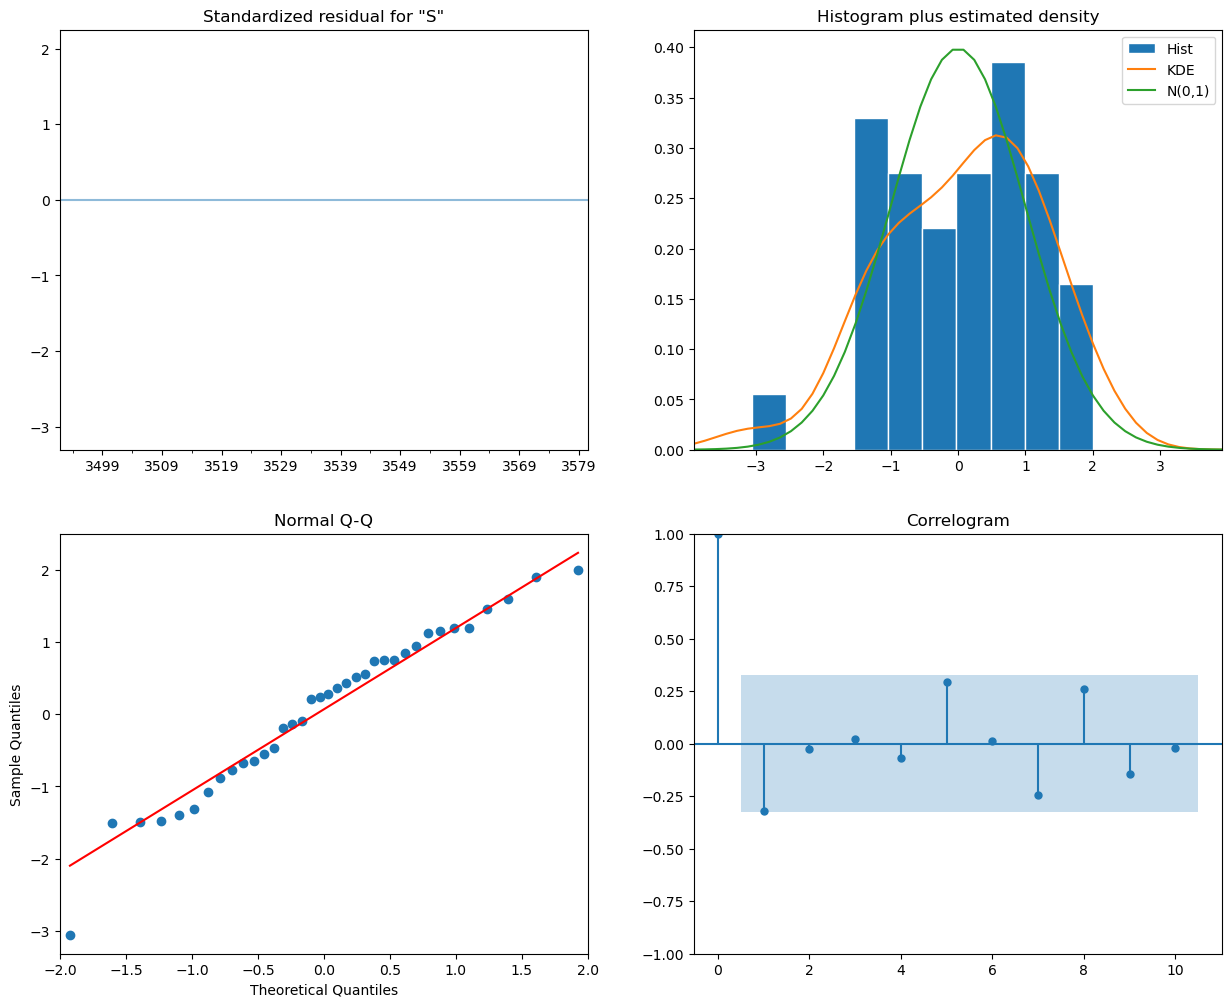

In [34]:
sarima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [35]:
forecast_test_sarima=sarima_model.predict(start=48,end=59,dynamic=True)

In [36]:
sales_k['Forecast_SARIMA']=[None]*len(train)+ list(forecast_test_sarima)
#sales_b[['Sales','Forecast_SARIMA']].plot(figsize=(12,8))

Text(0.5, 1.0, 'Product K')

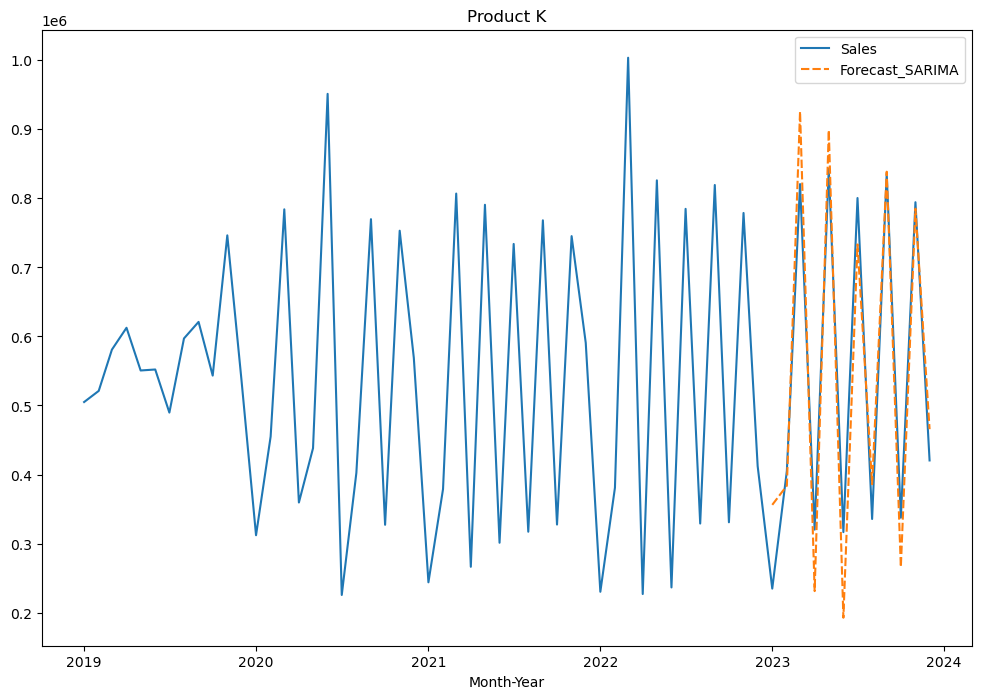

In [37]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_k[['Sales','Forecast_SARIMA']])
plt.title('Product K')

In [38]:
mae_sarima= mean_absolute_error(test,forecast_test_sarima)
mape_sarima= mean_absolute_percentage_error(test,forecast_test_sarima)
mse_sarima=mean_squared_error(test, forecast_test_sarima)
rmse_sarima= np.sqrt(mean_squared_error(test,forecast_test_sarima))

print(f'MAE - SARIMA: {round(mae_sarima,3)}')
print(f'MAPE - SARIMA: {round(mape_sarima,3)}')
print(f'MSE - SARIMA: {round(mse_sarima,3)}')
print(f'RMSE - SARIMA: {round(rmse_sarima,3)}')

MAE - SARIMA: 63637.024
MAPE - SARIMA: 0.167
MSE - SARIMA: 5583524756.865
RMSE - SARIMA: 74722.987


# AUTO-ARIMA

In [39]:
import pmdarima as pm

In [40]:
auto_arima= pm.auto_arima(train, start_p=0, d=0, start_q=0, max_p=6,max_q=4,
                          start_P=0, D=1, start_Q=0, max_P=4 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12)
auto_arima

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=984.159, Time=0.03 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=985.174, Time=0.07 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=987.172, Time=0.23 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=985.144, Time=0.09 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=987.142, Time=0.32 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=987.125, Time=0.21 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=990.858, Time=1.32 sec
 ARIMA(0,0,0)(3,1,0)[12] intercept   : AIC=988.983, Time=0.81 sec
 ARIMA(0,0,0)(3,1,1)[12] intercept   : AIC=inf, Time=4.02 sec
 ARIMA(0,0,0)(3,1,2)[12] intercept   : AIC=inf, Time=7.13 sec
 ARIMA(0,0,0)(4,1,0)[12] intercept   : AIC=990.972, Time=1.86 sec
 ARIMA(0,0,0)(4,1,1)[12] intercept   : AIC=inf, Time=8.19 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=974.395, Time=0.07 sec
 ARIMA(0,0,1)(0,1,1)[12] inter

ARIMA(order=(0, 0, 2), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True)

In [41]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   48
Model:             SARIMAX(0, 0, 2)x(1, 1, [], 12)   Log Likelihood                -478.403
Date:                             Thu, 09 May 2024   AIC                            966.806
Time:                                     19:50:01   BIC                            974.724
Sample:                                 01-01-2019   HQIC                           969.570
                                      - 12-01-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -1.19e+04   1.69e+04     -0.702      0.482   -4.51e+04    2.13e+04
ma.L1         -0.6902      0.089     -7.757      0.000      -0.865      -0.516
ma.L2          0.3060      0.073      4.181      0.000       0.163       0.449
ar.S.L12      -0.0774      0.045     -1.726      0.084      -0.165       0.010
sigma2      1.721e+10      0.018   9.61e+11      0.000    1.72e+10    1.72e+10
===================================================================================
Ljung-Box (L1) (Q):                   4.54   Jarque-Bera (JB):                 1.81
Prob(Q):                              0.03   Prob(JB):                         0.40
Heteroskedasticity (H):               0.35   Skew:                            -0.09
Prob(H) (two-sided):                  0.08   Kurtosis:                         4.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.18e+27. Standard errors may be unstable.
"""

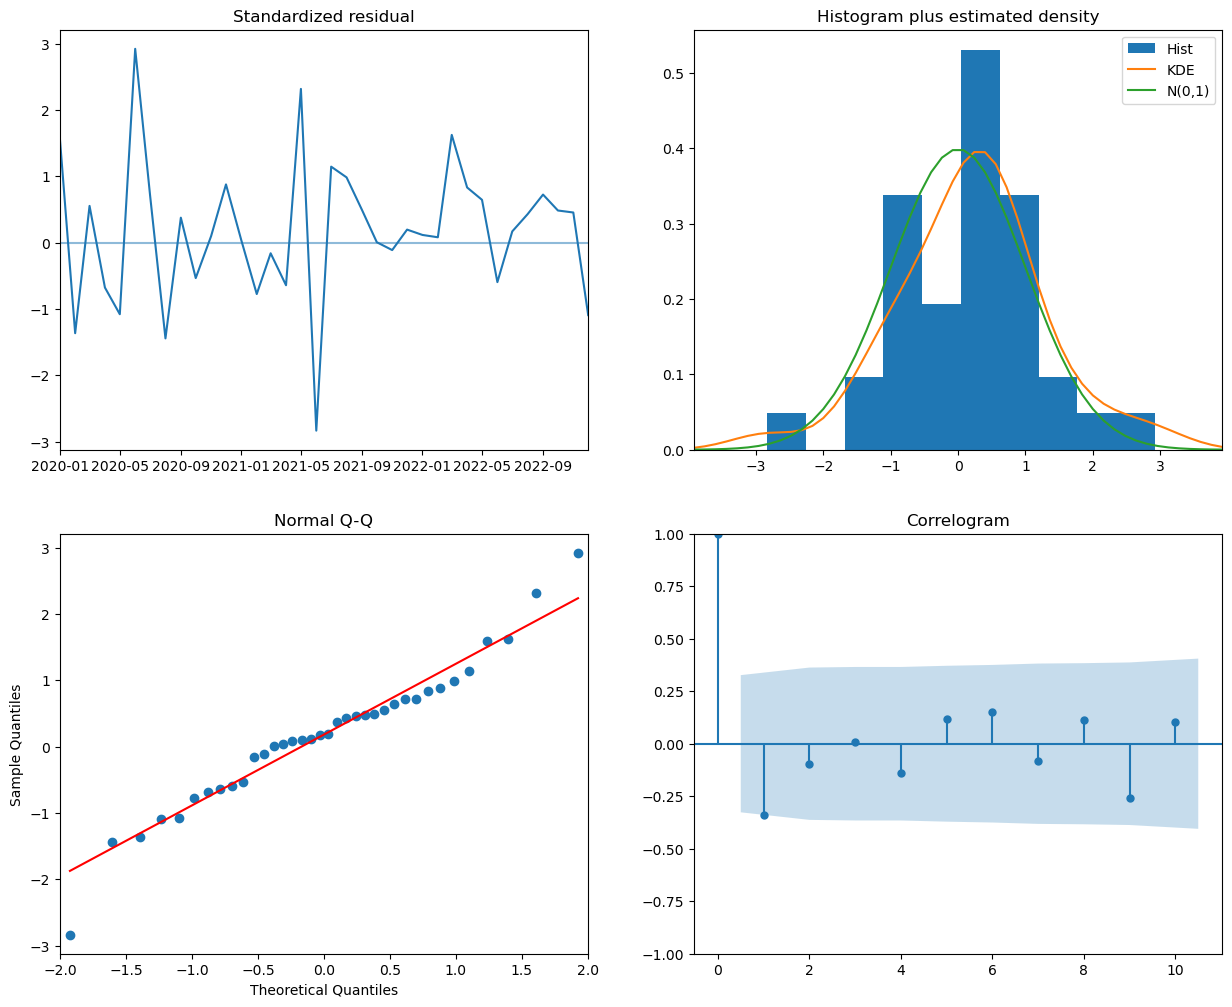

In [42]:
auto_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [43]:
forecast_test_auto= auto_arima.predict(n_periods=len(test))
sales_k['Forecast_AUTO ARIMA']=[None]*len(train)+ list(forecast_test_auto)
#sales_k.plot()

Text(0.5, 1.0, 'Product K')

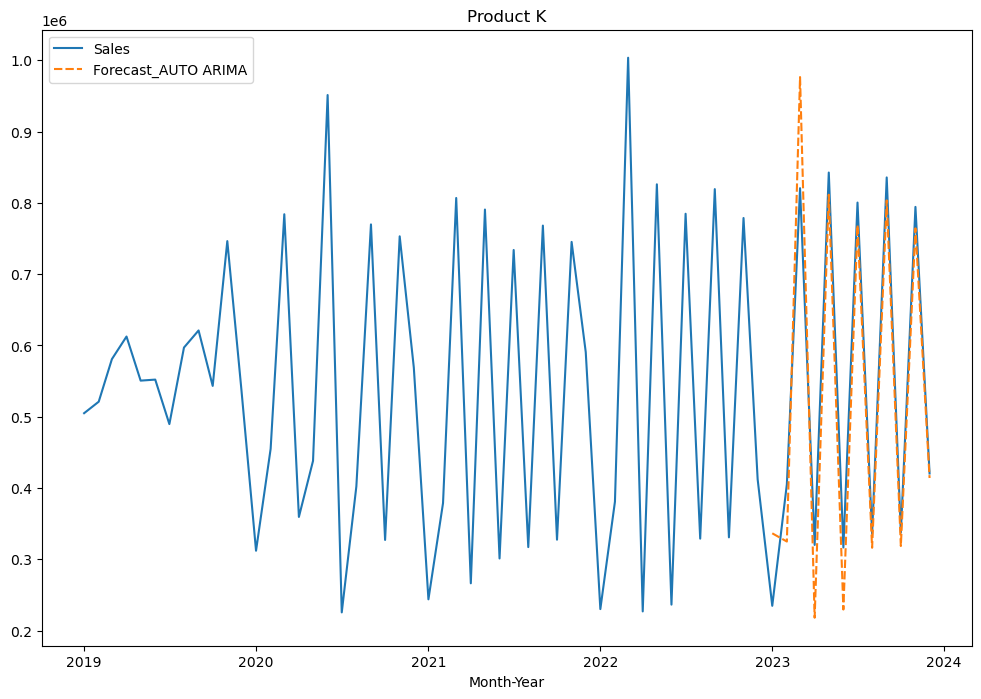

In [44]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_k[['Sales','Forecast_AUTO ARIMA']])
plt.title('Product K')

In [45]:
mae_auto_arima= mean_absolute_error(test,forecast_test_auto)
mape_auto_arima= mean_absolute_percentage_error(test,forecast_test_auto)
mse_auto_arima=mean_squared_error(test,forecast_test_auto)
rmse_auto_arima= np.sqrt(mean_squared_error(test,forecast_test_auto))

print(f'MAE - AUTO ARIMA: {mae_auto_arima}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima}')

MAE - AUTO ARIMA: 58039.155770883546
MAPE - AUTO ARIMA: 0.1413445387509684
MSE - AUTO ARIMA: 5313357722.677501
RMSE - AUTO ARIMA: 72892.78237711536


# FORECASTING

In [19]:
auto_arima_forecast= pm.auto_arima(sales_k['Sales'], start_p=0, d=0, start_q=0, max_p=5,max_q=3,
                          start_P=0, D=1, start_Q=0, max_P=2 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12)
auto_arima_forecast

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1298.880, Time=0.04 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1299.089, Time=0.08 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=1301.061, Time=0.25 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1299.123, Time=0.06 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=1301.089, Time=0.16 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1300.976, Time=0.16 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=1302.881, Time=0.54 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=1304.857, Time=0.89 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1284.762, Time=0.05 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1286.308, Time=0.16 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=1288.124, Time=0.45 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1286.144, Time=0.12 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=1287.074, Time=0.38 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=1.56 sec
 ARIM

ARIMA(order=(0, 0, 2), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True)

In [20]:
forecast_autoarima= auto_arima_forecast.predict(n_periods=12)

In [21]:
forecast_autoarima

2024-01-01    225960.186809
2024-02-01    400379.121327
2024-03-01    828901.061255
2024-04-01    304754.277694
2024-05-01    833754.818420
2024-06-01    302295.734991
2024-07-01    791701.512261
2024-08-01    327614.626501
2024-09-01    826902.372498
2024-10-01    329455.545414
2024-11-01    785638.696967
2024-12-01    412271.382961
Freq: MS, dtype: float64

Text(0.5, 1.0, 'Product K')

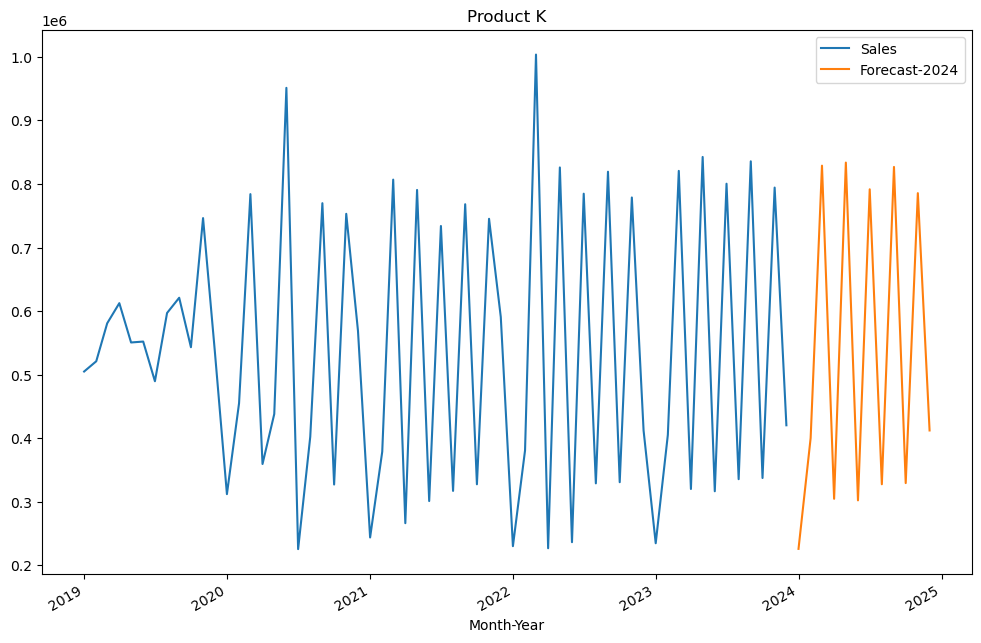

In [22]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_k[['Sales']])
forecast_autoarima.plot(legend=True, label='Forecast-2024')
plt.title('Product K')

In [53]:
sales_k.tail(12)

,Sales,Forecast_ARIMA,Forecast_SARIMA,Forecast_AUTO ARIMA
Month-Year,,,,
2023-01-01,234804,592825.905070,356079.868421,336502.346932
2023-02-01,405296,343219.680567,383880.698759,324971.149680
2023-03-01,820679,770271.334722,925941.860888,976557.325639
2023-04-01,320174,386180.905069,231176.771161,218093.239976
2023-05-01,842609,734265.458561,898767.597370,811452.288551
2023-06-01,316593,370347.511637,192619.190956,229585.108352
2023-07-01,800485,635035.438823,733222.772303,768959.696345
2023-08-01,335618,356037.336363,386064.822544,316221.724134
2023-09-01,835745,719367.537558,838579.687003,803502.155010


In [54]:
sales_k.mean()

Sales                  538321.733333
Forecast_ARIMA         535606.647734
Forecast_SARIMA        538595.273175
Forecast_AUTO ARIMA    523581.456324
dtype: float64

In [55]:
data = {
    'model': ['ARIMA', 'AUTO ARIMA', 'SEASONAL ARIMA'],
    'MAE': [mae_arima, mae_auto_arima, mae_sarima],  
    'MAPE': [mape_arima, mape_auto_arima, mape_sarima],  
    'MSE': [mse_arima, mse_auto_arima, mse_sarima],  
    'RMSE': [rmse_arima, rmse_auto_arima, rmse_sarima]  
}

model_results = pd.DataFrame(data)
model_results.set_index('model', inplace=True)
model_results

,MAE,MAPE,MSE,RMSE
model,,,,
ARIMA,101564.559278,0.260901,1.767619e+10,132951.834402
AUTO ARIMA,58039.155771,0.141345,5.313358e+09,72892.782377
SEASONAL ARIMA,63637.024136,0.166879,5.583525e+09,74722.986804


# TESING

In [19]:
auto_arima_1= pm.auto_arima(train, start_p=0, start_q=0, max_p=5,max_q=3,
                          start_P=0, start_Q=0, max_P=2 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12)
auto_arima_1

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=984.159, Time=0.04 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=985.174, Time=0.10 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=987.172, Time=0.22 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=985.144, Time=0.08 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=987.142, Time=0.31 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=987.125, Time=0.24 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=990.858, Time=1.38 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=974.395, Time=0.10 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=inf, Time=1.43 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=976.206, Time=0.17 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=1.86 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept

ARIMA(order=(0, 0, 2), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True)

In [20]:
auto_arima_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   48
Model:             SARIMAX(0, 0, 2)x(1, 1, [], 12)   Log Likelihood                -478.403
Date:                             Wed, 08 May 2024   AIC                            966.806
Time:                                     20:26:40   BIC                            974.724
Sample:                                 01-01-2019   HQIC                           969.570
                                      - 12-01-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -1.19e+04   1.69e+04     -0.702      0.482   -4.51e+04    2.13e+04
ma.L1         -0.6902      0.089     -7.757      0.000      -0.865      -0.516
ma.L2          0.3060      0.073      4.181      0.000       0.163       0.449
ar.S.L12      -0.0774      0.045     -1.726      0.084      -0.165       0.010
sigma2      1.721e+10      0.018   9.61e+11      0.000    1.72e+10    1.72e+10
===================================================================================
Ljung-Box (L1) (Q):                   4.54   Jarque-Bera (JB):                 1.81
Prob(Q):                              0.03   Prob(JB):                         0.40
Heteroskedasticity (H):               0.35   Skew:                            -0.09
Prob(H) (two-sided):                  0.08   Kurtosis:                         4.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.18e+27. Standard errors may be unstable.
"""

In [22]:
forecast_test_auto_1= auto_arima_1.predict(n_periods=len(test))
sales_k['Forecast_AUTO ARIMA_1']=[None]*len(train)+ list(forecast_test_auto_1)

Text(0.5, 1.0, 'Product K')

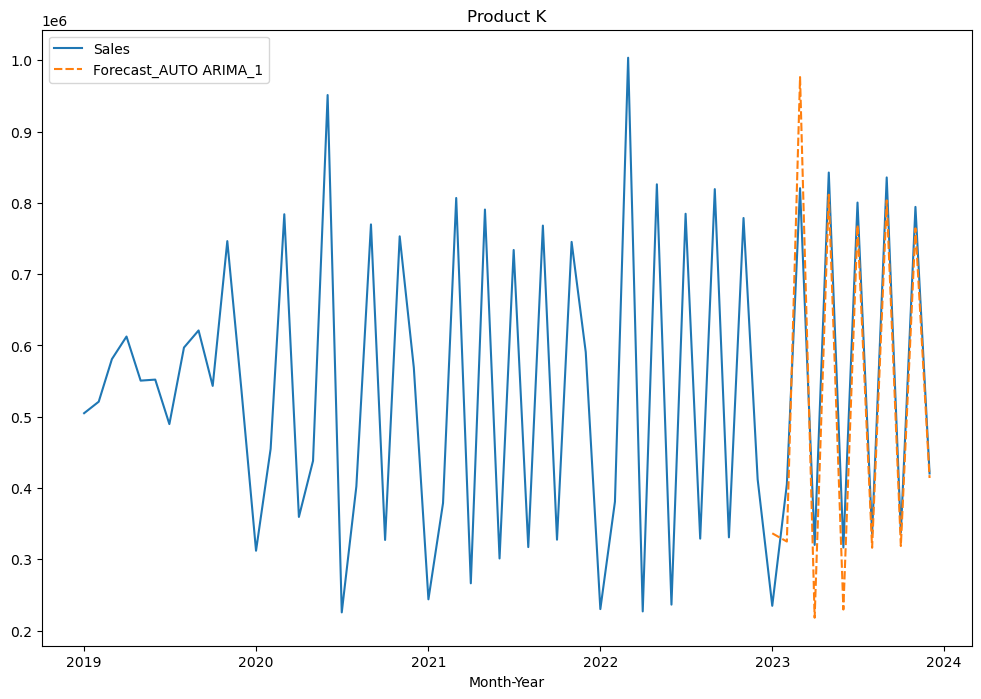

In [23]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_k[['Sales','Forecast_AUTO ARIMA_1']])
plt.title('Product K')

In [24]:
mae_auto_arima_1= mean_absolute_error(test,forecast_test_auto_1)
mape_auto_arima_1= mean_absolute_percentage_error(test,forecast_test_auto_1)
mse_auto_arima_1=mean_squared_error(test,forecast_test_auto_1)
rmse_auto_arima_1= np.sqrt(mean_squared_error(test,forecast_test_auto_1))

print(f'MAE - AUTO ARIMA: {mae_auto_arima_1}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima_1}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima_1}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima_1}')

MAE - AUTO ARIMA: 58039.155770883546
MAPE - AUTO ARIMA: 0.1413445387509684
MSE - AUTO ARIMA: 5313357722.677501
RMSE - AUTO ARIMA: 72892.78237711536
